In [1]:
import numpy as np
import matplotlib.pyplot as plt

from autoencoder import Autoencoder
from tensorflow.keras.datasets import mnist

%config Completer.use_jedi = False

In [2]:
def select_images(images, labels, num_images=10):
    sample_images_index = np.random.choice(range(len(images)), num_images)
    sample_images = images[sample_images_index]
    sample_labels = labels[sample_images_index]
    return sample_images, sample_labels


def plot_reconstructed_images(images, reconstructed_images):
    fig = plt.figure(figsize=(15, 3))
    num_images = len(images)
    for i, (image, reconstructed_image) in enumerate(zip(images, reconstructed_images)):
        image = image.squeeze()
        ax = fig.add_subplot(2, num_images, i + 1)
        ax.axis("off")
        ax.imshow(image, cmap="gray_r")
        reconstructed_image = reconstructed_image.squeeze()
        ax = fig.add_subplot(2, num_images, i + num_images + 1)
        ax.axis("off")
        ax.imshow(reconstructed_image, cmap="gray_r")
    plt.show()


def plot_images_encoded_in_latent_space(latent_representations, sample_labels):
    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0],
                latent_representations[:, 1],
                cmap="rainbow",
                c=sample_labels,
                alpha=0.5,
                s=2)
    plt.colorbar()
    plt.show()
    
    
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # apply normalization
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    # add channel dimension
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.reshape(x_test.shape + (1,))
    return x_train, y_train, x_test, y_test

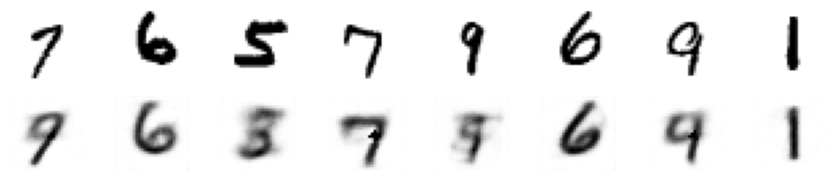

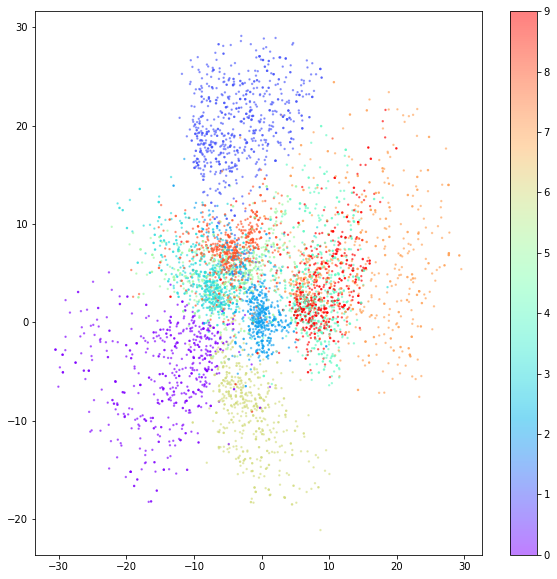

In [3]:
# if __name__ == "__main__":
if (1):
    autoencoder = Autoencoder.load("model")
    x_train, y_train, x_test, y_test = load_mnist()

    num_sample_images_to_show = 8
    sample_images, _ = select_images(x_test, y_test, num_sample_images_to_show)
    reconstructed_images, _ = autoencoder.reconstruct(sample_images)
    plot_reconstructed_images(sample_images, reconstructed_images)
    
    num_images = 6000
    sample_images, sample_labels = select_images(x_test, y_test, num_images)
    _, latent_representations = autoencoder.reconstruct(sample_images)
    plot_images_encoded_in_latent_space(latent_representations,sample_labels)    